<a href="https://colab.research.google.com/github/femi1609/femi1609/blob/main/Product_Recommendation_System_for_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Product Recommendation System for e-commerce businesses

When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD
plt.style.use("ggplot")

#### Loading the dataset

In [36]:
ratings_beauty = pd.read_csv('ratings_Beauty.csv')
ratings_beauty = ratings_beauty.dropna()
ratings_beauty.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [37]:
ratings_beauty.shape

(2023070, 4)

In [38]:
popular_products = pd.DataFrame(ratings_beauty.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

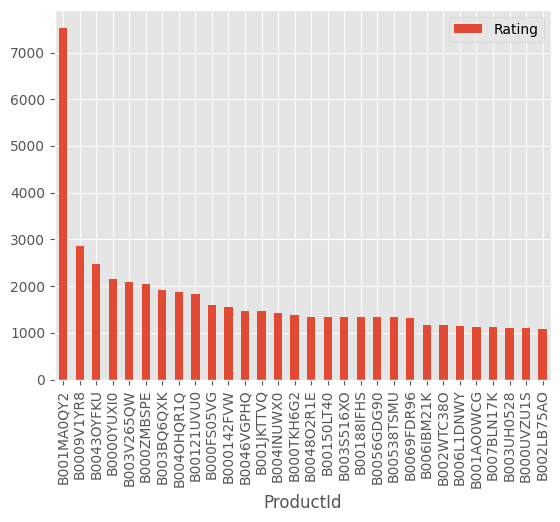

In [39]:
most_popular.head(30).plot(kind = "bar")

**Analysis:**

* The above graph gives us the most popular products (arranged in descending order) sold by the business.

* For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of  3000, etc.     

In [40]:
# Subset of Amazon Ratings
ratings_beauty1 = ratings_beauty.head(10000)

In [41]:
ratings_utility_matrix = ratings_beauty1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The utility matrix obtaned above is sparce, and filled up the unknown values wth 0.

In [42]:
ratings_utility_matrix.shape

(9697, 886)

Transposing the matrix

In [43]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X.shape

(886, 9697)

Unique products in subset of data

In [45]:
X1 = X

### Decomposing the Matrix

In [46]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

### Correlation Matrix

In [47]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

### Isolating Product ID # 6053640972 from the Correlation Matrix

Assuming the customer buys Product ID # 6053640972 (randomly chosen)

In [49]:
X.index[98]

'6053640972'

Index # of product ID purchased by customer

In [50]:
i = "6053640972"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

98

In [51]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

### Recommending top 10 highly correlated products in sequence

In [52]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['0205616461',
 '0733001998',
 '0737104473',
 '1304139212',
 '1304139220',
 '130414089X',
 '130414643X',
 '130414674X',
 '1304174778']

In [53]:
# Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

### Item to item based recommendation system based on product description


In [55]:
product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

(124428, 2)

#### Checking for missing values

In [56]:
product_descriptions.isnull().sum()

,0
product_uid,0
product_description,0


In [57]:
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [58]:
product_descriptions1 = product_descriptions.head(500)

product_descriptions1["product_description"].head(10)

,product_description
0,"Not only do angles make joints stronger, they ..."
1,BEHR Premium Textured DECKOVER is an innovativ...
2,Classic architecture meets contemporary design...
3,The Grape Solar 265-Watt Polycrystalline PV So...
4,Update your bathroom with the Delta Vero Singl...
5,Achieving delicious results is almost effortle...
6,The Quantum Adjustable 2-Light LED Black Emerg...
7,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9,Valley View Industries Metal Stakes (4-Pack) a...


In [59]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

#### Visualizing product clusters in subset of data

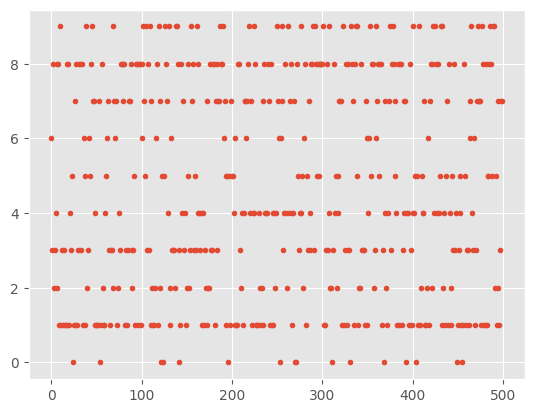

In [60]:
# Fitting K-Means to the dataset
X=X1
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [61]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

## Output
* Recommendation of product based on the current product selected by user.


#### Top words in each cluster based on product description

In [62]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# Use get_feature_names_out instead of get_feature_names
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 tape
 film
 painting
 drop
 carpet
 cloths
 shrink
 scotch
 recommended
 masking
Cluster 1:
 wood
 finish
 use
 commercial
 indoor
 look
 tile
 durable
 outdoor
 paint
Cluster 2:
 design
 light
 fixture
 pliers
 glass
 collection
 mix
 fixtures
 energy
 markor
Cluster 3:
 cooking
 oven
 cycle
 cu
 wash
 steam
 dryer
 burner
 options
 large
Cluster 4:
 ft
 moulding
 painted
 post
 fence
 easy
 rail
 cut
 add
 base
Cluster 5:
 frame
 patio
 dining
 cushions
 wicker
 piece
 screen
 coated
 roller
 outdoor
Cluster 6:
 landscape
 steel
 post
 outdoor
 wood
 treated
 product
 lumber
 quality
 used
Cluster 7:
 water
 wall
 easy
 metal
 gal
 year
 use
 design
 tank
 watering
Cluster 8:
 light
 watt
 installation
 help
 mount
 nickel
 fan
 use
 easy
 features
Cluster 9:
 air
 power
 cooling
 ft
 easy
 snow
 insulation
 unit
 control
 protection


#### Predicting clusters based on key search words

In [63]:
def show_recommendations(product):
    print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print(prediction)
    print_cluster(prediction[0])

In [30]:
show_recommendations("cutting tool")

Cluster ID:
[6]
Cluster 6:
 metal
 gauge
 steel
 drill
 screw
 screws
 tool
 20
 lithium
 power


In [31]:
show_recommendations("spray paint")

Cluster ID:
[8]
Cluster 8:
 watering
 easy
 shower
 plants
 use
 head
 gal
 handle
 spray
 design


In [70]:
show_recommendations("design")

Cluster ID:
[2]
Cluster 2:
 design
 light
 fixture
 pliers
 glass
 collection
 mix
 fixtures
 energy
 markor


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

In [65]:
show_recommendations("wash")

Cluster ID:
[3]
Cluster 3:
 cooking
 oven
 cycle
 cu
 wash
 steam
 dryer
 burner
 options
 large


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.